# Sınıflandırma Problemleri

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from warnings import filterwarnings
filterwarnings('ignore')

**Hedef Değişken**, RiskLevel: **high risk** -> Hamilelik riski yüksek
                            **mid risk** -> Hamilelik riski orta
                            **low risk** -> Hamilelik sağlıklı

**Amaç**: Bir gebenin hamileliğinin riskli olup olmadığını tahmin eden bir model oluşturmak.

In [2]:
df_2 = pd.read_excel("güncel_veriSeti.xlsx")
df = df_2.copy()
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15,98.0,76,high risk
1,35,140,90,9,100.0,70,high risk
2,29,90,70,8,98.0,80,high risk
3,30,140,127,7,98.0,70,high risk
4,35,120,60,6,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,9,98.0,80,high risk
1010,55,120,90,9,98.0,60,high risk
1011,35,85,60,9,98.0,86,high risk
1012,43,120,90,8,98.0,76,high risk


In [3]:
df['RiskLevel'] = df['RiskLevel'].astype('category') #riskleveli category değişkene çevirdik

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          1014 non-null   int64   
 1   SystolicBP   1014 non-null   int64   
 2   DiastolicBP  1014 non-null   int64   
 3   BS           1014 non-null   int64   
 4   BodyTemp     1014 non-null   float64 
 5   HeartRate    1014 non-null   int64   
 6   RiskLevel    1014 non-null   category
dtypes: category(1), float64(1), int64(5)
memory usage: 48.8 KB


In [5]:
df["RiskLevel"].value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

# KNN  (K-EN YAKIN KOMŞU MODELİ)

In [6]:
y = df["RiskLevel"]
X = df.drop(['RiskLevel'], axis=1) ## Veri setinden bağımlı ve bağımsız değişkenlerini tanımlama
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,   # Veriyi eğitim ve test setlerine ayırma
                                                    random_state=64)

In [7]:
knn = KNeighborsClassifier() ## KNN modelini oluşturma

In [8]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [9]:
knn_params = {"n_neighbors": np.arange(1,100)} #bu hiperparametreyi değerlendirmek için 1'den 99'a kadar olan farklı komşu sayılarını denedik  
#n_neighbors parametresi, tahmin yaparken kullanılan komşu sayısını belirler.

In [10]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)
#cv parametresi, veri setini kaç parçaya böleceğinizi belirler ve her bir parçanın sırayla test seti olarak kullanılmasını sağlar.

In [11]:
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi parametreler: {'n_neighbors': 1}


In [12]:
knn = KNeighborsClassifier(1) # En iyi parametreleri kullanarak modeli tekrar oluşturma
knn_tuned = knn.fit(X_train, y_train)

In [13]:
knn_tuned.score(X_test, y_test)#bu şekilde de accuracy metriğine ulaşabiliriz

0.7540983606557377

In [14]:
y_pred = knn_tuned.predict(X_test) # Model performansını değerlendirme

In [15]:
accuracy_score(y_test, y_pred)

0.7540983606557377

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   high risk       0.83      0.79      0.81        85
    low risk       0.71      0.76      0.73       112
    mid risk       0.75      0.72      0.74       108

    accuracy                           0.75       305
   macro avg       0.76      0.76      0.76       305
weighted avg       0.76      0.75      0.75       305



# Yapay Sinir Ağları

In [17]:
y = df["RiskLevel"]
X = df.drop(['RiskLevel'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=64)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [19]:
scaler = StandardScaler() # Veriyi standartlaştırma

In [20]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) # Veriyi standartlaştırma
X_test_scaled = scaler.transform(X_test)

In [21]:
mlpc = MLPClassifier() # MLPClassifier modelini oluşturma
mlpc.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [22]:
mlpc_params = {
    "alpha": [0.1, 0.01, 0.02, 0.005, 0.0001, 0.00001],
    "hidden_layer_sizes": [(10, 10, 10), (100, 100, 100), (100, 100),(50,50), (3, 5), (5, 3)],
    "solver": ["lbfgs", "adam", "sgd"],
    "activation": ["relu", "logistic"] # Model için hiperparametre optimizasyonu (GridSearchCV)
}

In [23]:
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2).fit(X_train_scaled, y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


In [24]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'lbfgs'}


In [25]:
mlpc_tuned = MLPClassifier(activation = "relu", # En iyi parametreleri kullanarak modeli tekrar oluşturma
                           alpha = 0.1, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "lbfgs")

In [26]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver='lbfgs')

In [27]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)# Model performansını değerlendirme

0.7770491803278688

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   high risk       0.82      0.82      0.82        85
    low risk       0.75      0.86      0.80       112
    mid risk       0.77      0.66      0.71       108

    accuracy                           0.78       305
   macro avg       0.78      0.78      0.78       305
weighted avg       0.78      0.78      0.77       305



# Random Forests

In [29]:
y = df["RiskLevel"]
X = df.drop(['RiskLevel'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=64)

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf_model = RandomForestClassifier() # RandomForestClassifier modelini oluşturma

In [32]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,100,500,700,1000],
            "min_samples_split": [2,5,10]} # Model için hiperparametre optimizasyonu 

#"n_estimators"; kullanılacak ağaç sayısı
#max_features;  bölünmeler için maksimum kaç özellik gerekli bilgisidir
#"max_depth", "min_samples_split" CART algoritmasında da bahsedilen parametreler

In [34]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, # Model için hiperparametre optimizasyonu 
                           verbose = 2).fit(X_train, y_train) 

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [35]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [64]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 2, 
                                  min_samples_split = 2, # En iyi parametreleri kullanarak modeli tekrar oluşturma
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=2, n_estimators=1000)

In [65]:
y_pred = rf_tuned.predict(X_test) # Model performansını değerlendirme
accuracy_score(y_test, y_pred)

0.7573770491803279

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   high risk       0.85      0.82      0.84        85
    low risk       0.70      0.88      0.77       112
    mid risk       0.77      0.58      0.66       108

    accuracy                           0.76       305
   macro avg       0.77      0.76      0.76       305
weighted avg       0.77      0.76      0.75       305



# LightGBM

In [67]:
y = df["RiskLevel"]
X = df.drop(['RiskLevel'], axis=1) # LGBMClassifier modelini oluşturma
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=64)

In [7]:
#!conda install -c conda-forge lightgbm
!pip install lightgbm
from lightgbm import LGBMClassifier

In [8]:
lgbm_model = LGBMClassifier()

In [9]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [10]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]} # Model için hiperparametre optimizasyonu

#"min_child_samples": Bir yaprak node için ihtiyaç duyulan minimum veri sayısı

In [11]:
lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2).fit(X_train, y_train)


Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 102
[LightGBM] [Info] Number of data points in the train set: 709, number of used features: 6
[LightGBM] [Info] Start training from score -1.332747
[LightGBM] [Info] Start training from score -0.880276
[LightGBM] [Info] Start training from score -1.134510
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [12]:
lgbm_cv_model.best_params_ 

{'learning_rate': 0.01,
 'max_depth': 6,
 'min_child_samples': 20,
 'n_estimators': 1000,
 'subsample': 0.6}

In [13]:
lgbm_model = LGBMClassifier(learning_rate = 0.01, # En iyi parametreleri kullanarak modeli tekrar oluşturma
                       max_depth = 6,
                       subsample = 0.6,
                       n_estimators = 1000,
                       min_child_samples = 20)

In [14]:
lgbm_tuned = lgbm_model.fit(X_train,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 102
[LightGBM] [Info] Number of data points in the train set: 709, number of used features: 6
[LightGBM] [Info] Start training from score -1.332747
[LightGBM] [Info] Start training from score -0.880276
[LightGBM] [Info] Start training from score -1.134510
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [15]:
y_pred = lgbm_tuned.predict(X_test) # Model performansını değerlendirme
accuracy_score(y_test, y_pred)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.760655737704918

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   high risk       0.83      0.87      0.85        85
    low risk       0.71      0.85      0.77       112
    mid risk       0.77      0.58      0.66       108

    accuracy                           0.76       305
   macro avg       0.77      0.77      0.76       305
weighted avg       0.76      0.76      0.76       305



# Tüm Modellerin Karşılaştırılması

In [76]:
modeller = [
    knn_tuned,
    mlpc_tuned,
    rf_tuned,
    lgbm_tuned,
    
]

for model in modeller:
    isimler = model.__class__.__name__
    if isimler == "MLPClassifier":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 75.4098%
----------------------------
MLPClassifier:
Accuracy: 78.6885%
----------------------------
RandomForestClassifier:
Accuracy: 75.7377%
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
----------------------------
LGBMClassifier:
Accuracy: 76.0656%


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


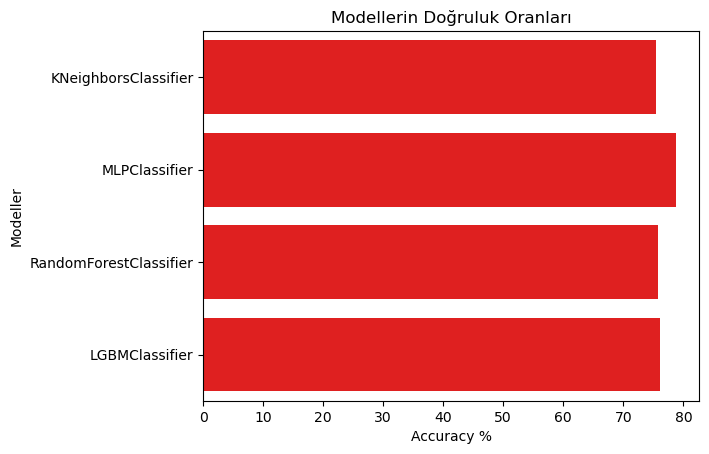

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Modelleri tanımlayın
modeller = [
    knn_tuned,
    mlpc_tuned,
    rf_tuned,
    lgbm_tuned,
]

# Modellerin doğruluk oranlarını saklamak için boş listeler oluşturun
modeller_listesi = []
dogruluk_listesi = []

# Modelleri değerlendirin
for model in modeller:
    isimler = model.__class__.__name__
    if isimler == "MLPClassifier":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    
    # Modelleri ve doğruluk oranlarını listelere ekleyin
    modeller_listesi.append(isimler)
    dogruluk_listesi.append(dogruluk * 100)

# Listeleri kullanarak yeni bir DataFrame oluşturun
sonuclar = pd.DataFrame({"Modeller": modeller_listesi, "Accuracy": dogruluk_listesi})

# Doğruluk oranlarını görselleştirin
sns.barplot(x='Accuracy', y='Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları')
plt.show()